In [107]:
import numpy as np
from Code.pde_solver import PDE_Solver
from Code.bs_solver import BlackScholes_Solver

In [108]:
def g(s):
    return np.maximum(s-1,0)

In [109]:
gamma = 0.2
r = 0.07
T_prime=5
t = 0
T = T_prime-t
a_x = 0.5
exp_a_x = np.e ** a_x

# sigma = 0.5 * (gamma**2)

# f = lambda x : np.exp( 1. / (gamma**2) * (r - (0.5) * gamma ** 2) * x ) * g(np.exp(x))
# V = lambda x,t : r + 0.5 / (gamma**2) * (r - (0.5) * gamma ** 2) ** 2

# print "sigma = ", sigma
# print "V = ", r + 0.5 / (gamma**2) * (r - (0.5) * gamma ** 2) ** 2
# print "T = ", T_prime-t

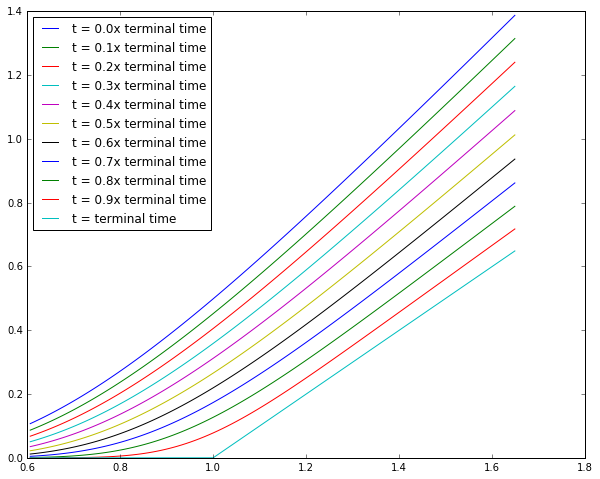

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))

t_variants = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
labels = ['t = 0.' + str(i) + 'x terminal time' for i in xrange(len(t_variants))] + ['t = terminal time']
for i in xrange(len(t_variants)):
    bs = BlackScholes_Solver(gamma=gamma, r=r, g=g, T_prime=T_prime, t=t_variants[i]*T_prime, n=20, exp_a_x=exp_a_x, M=100)
    bs.Solve()
    plt.plot(bs.s, bs.c, label=labels[i])
plt.plot(bs.s, g(bs.s), label = labels[-1])
plt.legend(loc='best')
plt.show()